In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [20]:
df = pd.read_csv("employee_turnover.csv")


In [21]:
df.head()

,Job_Satisfaction,Performance_Rating,Years_At_Company,Work_Life_Balance,Distance_From_Home,Monthly_Income,Education_Level,Age,Num_Companies_Worked,Employee_Role,Annual_Bonus,Training_Hours,Department,Annual_Bonus_Squared,Annual_Bonus_Training_Hours_Interaction,Employee_Turnover
0,0.562326,0.141129,0.123989,0.347583,0.330353,0.328853,0.600933,0.315990,0.768736,0.090671,0.324786,0.669193,0.602932,0.105486,0.217344,0
1,0.017041,0.559047,0.511203,0.793908,0.423550,0.553450,0.742009,0.897146,0.380035,0.601633,0.694611,0.043271,0.800761,0.482484,0.030056,0
2,0.774699,0.604371,0.798174,0.260500,0.804034,0.131800,0.775178,0.830947,0.218726,0.972936,0.153476,0.701336,0.705275,0.023555,0.107638,1
3,0.628174,0.385249,0.230104,0.516809,0.272248,0.589249,0.482409,0.090507,0.402746,0.132842,0.305973,0.549688,0.600531,0.093620,0.168190,0
4,0.799183,0.199967,0.839029,0.247927,0.341934,0.076818,0.055356,0.680860,0.923341,0.493017,0.844094,0.793751,0.664679,0.712494,0.670000,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Job_Satisfaction                         1350 non-null   float64
 1   Performance_Rating                       1350 non-null   float64
 2   Years_At_Company                         1350 non-null   float64
 3   Work_Life_Balance                        1350 non-null   float64
 4   Distance_From_Home                       1350 non-null   float64
 5   Monthly_Income                           1350 non-null   float64
 6   Education_Level                          1350 non-null   float64
 7   Age                                      1350 non-null   float64
 8   Num_Companies_Worked                     1350 non-null   float64
 9   Employee_Role                            1350 non-null   float64
 10  Annual_Bonus                             1350 no

In [23]:
df.describe()

,Job_Satisfaction,Performance_Rating,Years_At_Company,Work_Life_Balance,Distance_From_Home,Monthly_Income,Education_Level,Age,Num_Companies_Worked,Employee_Role,Annual_Bonus,Training_Hours,Department,Annual_Bonus_Squared,Annual_Bonus_Training_Hours_Interaction,Employee_Turnover
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1.350000e+03,1350.000000,1350.000000
mean,0.506386,0.487061,0.484761,0.499442,0.494884,0.509909,0.504329,0.500164,0.516149,0.506091,0.493360,0.486843,0.485767,3.291479e-01,0.240653,0.497778
std,0.291505,0.283808,0.282758,0.293013,0.289248,0.290110,0.295693,0.294835,0.295072,0.284901,0.292929,0.288342,0.285077,2.986314e-01,0.222281,0.500180
min,0.001738,0.000546,0.001545,0.000166,0.001319,0.005015,0.000424,0.000231,0.000150,0.000903,0.000491,0.001293,0.001595,2.410000e-07,0.000247,0.000000
25%,0.263051,0.238538,0.249651,0.246399,0.244162,0.263235,0.249894,0.239224,0.247978,0.269517,0.247274,0.233357,0.244944,6.114448e-02,0.058694,0.000000
50%,0.525340,0.468457,0.485414,0.495572,0.501617,0.532388,0.509448,0.499964,0.531408,0.504640,0.498490,0.475214,0.468982,2.484923e-01,0.165438,0.000000
75%,0.750987,0.724088,0.721622,0.753108,0.743938,0.761090,0.755113,0.767168,0.775888,0.761640,0.740231,0.747609,0.725870,5.479425e-01,0.367042,1.000000
max,0.998692,0.999957,0.999722,0.999931,0.997813,0.999143,0.999794,0.998365,0.999962,0.999964,0.998211,0.998330,0.999386,9.964245e-01,0.930338,1.000000


In [24]:
df.isnull().sum()

Job_Satisfaction                           0
Performance_Rating                         0
Years_At_Company                           0
Work_Life_Balance                          0
Distance_From_Home                         0
Monthly_Income                             0
Education_Level                            0
Age                                        0
Num_Companies_Worked                       0
Employee_Role                              0
Annual_Bonus                               0
Training_Hours                             0
Department                                 0
Annual_Bonus_Squared                       0
Annual_Bonus_Training_Hours_Interaction    0
Employee_Turnover                          0
dtype: int64

In [25]:
df.rename(columns={
    'time_spend_company':'time_spent_hours'
},inplace=True)

In [27]:

df=pd.get_dummies(df,drop_first=True)

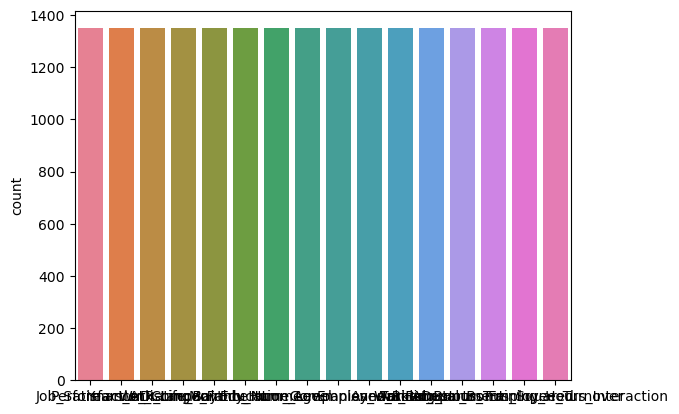

In [29]:
sns.countplot(data=df)
plt.show()

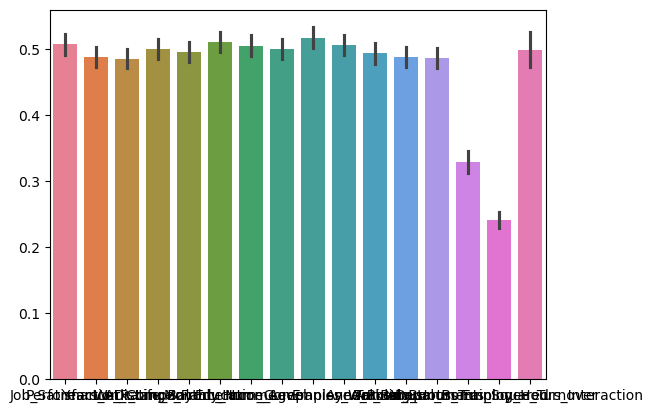

In [32]:
sns.barplot(data=df)
plt.show()

In [35]:
X=df.drop('Employee_Turnover',axis=1)
y=df['Employee_Turnover']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [38]:
lr =  LogisticRegression(max_iter=1000)
lasso =  LogisticRegression(penalty='l1',solver='liblinear')
ridge =  LogisticRegression(penalty='l2')

models = {
    'Baseline':lr,
    'Lasso':lasso,
    'Ridge':ridge
}


In [42]:
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(name)
    print("accuracy:",accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print("-" * 40)

Baseline
accuracy: 0.8592592592592593
[[130  15]
 [ 23 102]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       145
           1       0.87      0.82      0.84       125

    accuracy                           0.86       270
   macro avg       0.86      0.86      0.86       270
weighted avg       0.86      0.86      0.86       270

----------------------------------------
Lasso
accuracy: 0.8666666666666667
[[130  15]
 [ 21 104]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       145
           1       0.87      0.83      0.85       125

    accuracy                           0.87       270
   macro avg       0.87      0.86      0.87       270
weighted avg       0.87      0.87      0.87       270

----------------------------------------
Ridge
accuracy: 0.8592592592592593
[[130  15]
 [ 23 102]]
              precision    recall  f1-score   support

           0       0.85      0.9